In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [23]:
# Load the dataset
df = pd.read_csv('dataSet.csv')

In [25]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date and Time              240 non-null    object 
 1   AcademicYear               225 non-null    object 
 2   Department                 226 non-null    object 
 3   GPA                        225 non-null    float64
 4   Interest_AcademicWorkshop  225 non-null    float64
 5   Interest_CareerDev         225 non-null    float64
 6   Interest_SocialActivities  225 non-null    float64
 7   Interest_Sports            225 non-null    float64
 8   Interest_CulturalPrograms  225 non-null    float64
 9   Interest_TechMeetups       225 non-null    float64
 10  ParticipatedBefore         225 non-null    object 
 11  EventTypesAttended         220 non-null    object 
 12  EventAttendanceFrequency   225 non-null    object 
 13  Hypo_TechWorkshop          225 non-null    float64

In [28]:
df.drop('Date and Time', axis=1, inplace=True)
df.drop('Department', axis=1, inplace=True)
# Clean column names by stripping spaces
df.columns = [col.strip() for col in df.columns]

# Remove whitespace and invalid characters
df['GPA'] = df['GPA'].astype(str).str.strip()

# Replace commas with dots if needed
df['GPA'] = df['GPA'].str.replace(",", ".", regex=False)

# Convert to numeric, set errors='coerce' to convert non-numeric values to NaN
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')

# For example, you can drop NaNs or fill them with the average GPA
df['GPA'] = df['GPA'].fillna(df['GPA'].mean())  # or use df.dropna(subset=['GPA'])

# Option: Drop rows with invalid GPA
df = df[df['GPA'] <= 4.0]

df['Feedback'] = \
    df['Feedback'].fillna("No suggestion")

df = df.dropna(subset=['EventTypesAttended'])

df.to_csv("cleaned_dataset2.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset2.csv'")

Cleaned dataset saved as 'cleaned_dataset2.csv'


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 224
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcademicYear               220 non-null    object 
 1   GPA                        220 non-null    float64
 2   Interest_AcademicWorkshop  220 non-null    float64
 3   Interest_CareerDev         220 non-null    float64
 4   Interest_SocialActivities  220 non-null    float64
 5   Interest_Sports            220 non-null    float64
 6   Interest_CulturalPrograms  220 non-null    float64
 7   Interest_TechMeetups       220 non-null    float64
 8   ParticipatedBefore         220 non-null    object 
 9   EventTypesAttended         220 non-null    object 
 10  EventAttendanceFrequency   220 non-null    object 
 11  Hypo_TechWorkshop          220 non-null    float64
 12  Hypo_ResumeWorkshop        220 non-null    float64
 13  Hypo_CulturalNight         220 non-null    float64
 14 

In [30]:
df = pd.read_csv("cleaned_dataset2.csv")
df_encoded = df.copy()  

# Apply Label Encoding to all object-type columns
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))

# Apply MinMax Normalization to all numerical columns
scaler = MinMaxScaler()
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Save preprocessed dataset
df_encoded.to_csv("preprocessed_dataset6.csv", index=False)
print("Preprocessed dataset saved as 'preprocessed_dataset6.csv'")


Preprocessed dataset saved as 'preprocessed_dataset6.csv'


<Axes: >

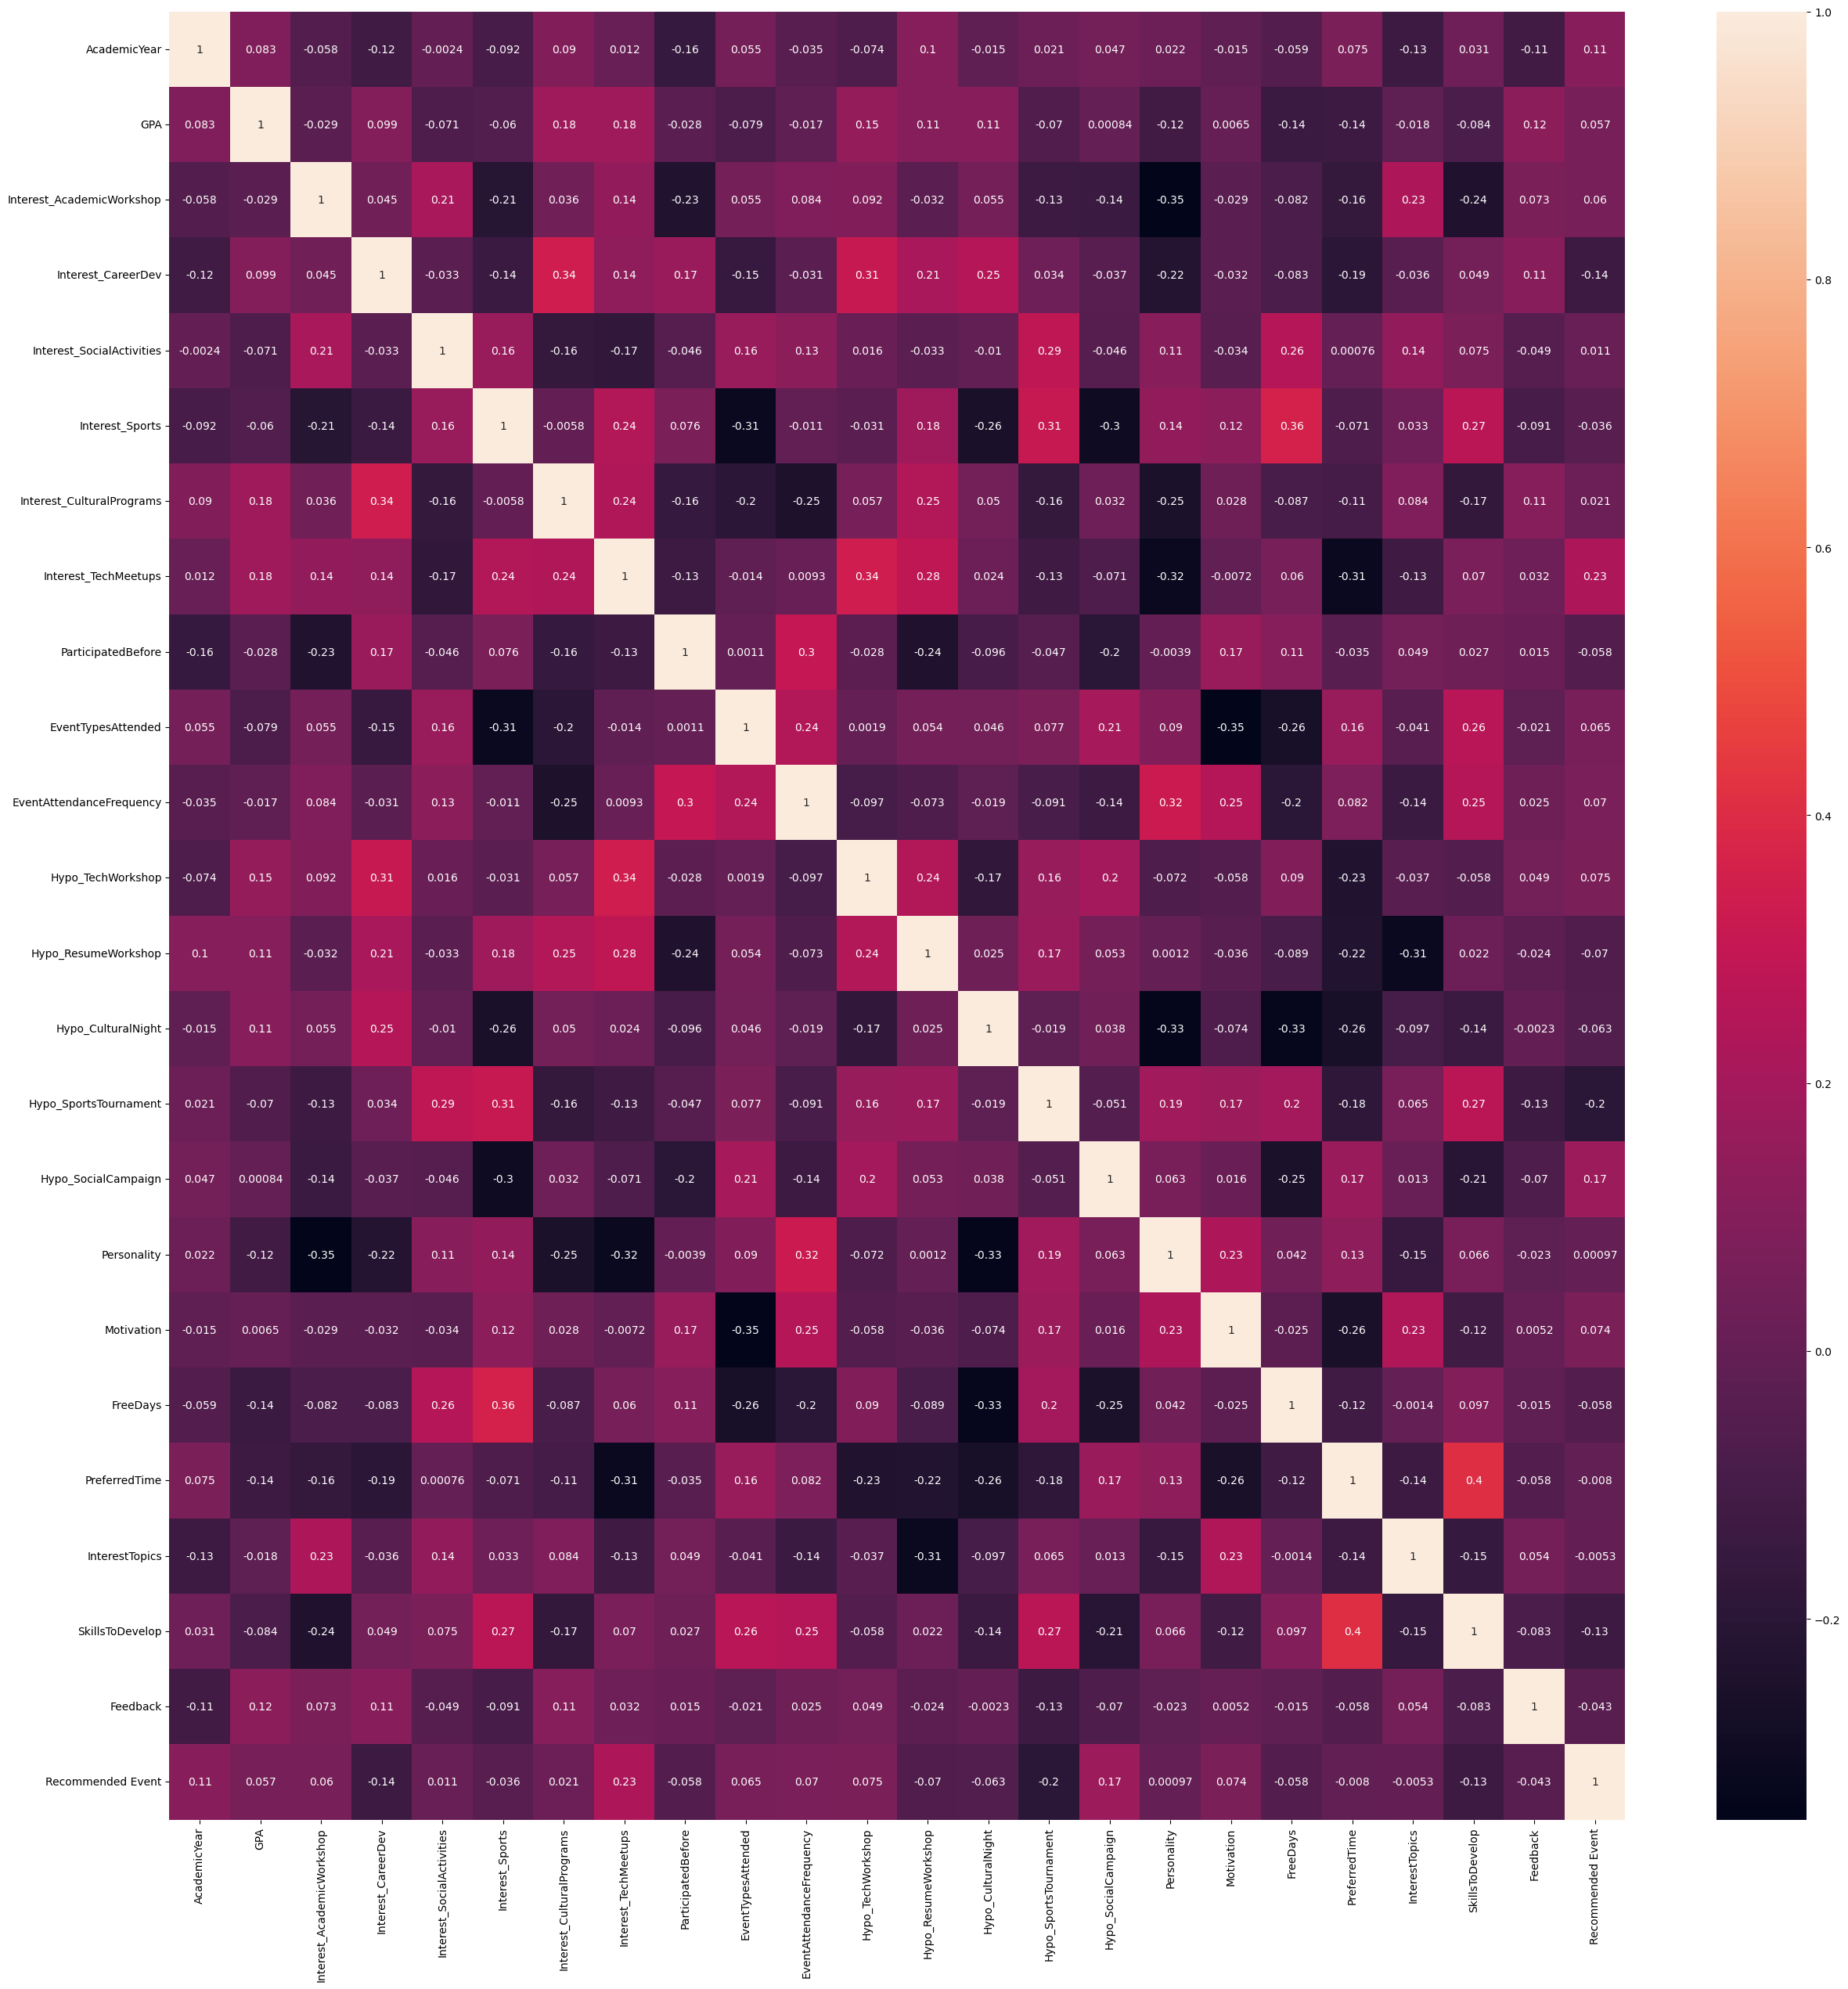

In [31]:
df=pd.read_csv("preprocessed_dataset6.csv")
s=df.select_dtypes(include="number").corr() 
plt.figure(figsize=(30,30))
sns.heatmap(s,annot=True)


In [34]:
# Load your dataset (update with your file name if not already loaded)
df = pd.read_csv("preprocessed_dataset6.csv")

# Define the columns to drop
cols_to_drop = [
    "EventAttendanceFrequency",
    "PreferredTime",
    "FreeDays",
    "Motivation",
    "Feedback"
]

# Drop from original DataFrame
df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')

# If you also have an encoded version (df_encoded), drop from it too
# Uncomment below lines if you have df_encoded
# df_encoded_cleaned = df_encoded.drop(columns=cols_to_drop, errors='ignore')

# Save the cleaned datasets
df_cleaned.to_csv("dropNewone.csv", index=False)

# If applicable, save the cleaned encoded dataset too
# df_encoded_cleaned.to_csv("cleaned_encoded_dataset.csv", index=False)

df_cleaned.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcademicYear               220 non-null    float64
 1   GPA                        220 non-null    float64
 2   Interest_AcademicWorkshop  220 non-null    float64
 3   Interest_CareerDev         220 non-null    float64
 4   Interest_SocialActivities  220 non-null    float64
 5   Interest_Sports            220 non-null    float64
 6   Interest_CulturalPrograms  220 non-null    float64
 7   Interest_TechMeetups       220 non-null    float64
 8   ParticipatedBefore         220 non-null    float64
 9   EventTypesAttended         220 non-null    float64
 10  Hypo_TechWorkshop          220 non-null    float64
 11  Hypo_ResumeWorkshop        220 non-null    float64
 12  Hypo_CulturalNight         220 non-null    float64
 13  Hypo_SportsTournament      220 non-null    float64

 UNIVERSITY EVENT RECOMMENDER SYSTEM
Loading dataset...
Labeled dataset saved as 'labeled_dropNewone.csv'
Dataset shape: (220, 20)
Features: (220, 17), Labels: (220,)

TRAINING MODEL
Training set: 176 samples
Test set: 44 samples

Training for 40 epochs...
Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.2714 - loss: 1.4119 - val_accuracy: 0.3056 - val_loss: 1.3735
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3429 - loss: 1.2926 - val_accuracy: 0.5278 - val_loss: 1.2556
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4286 - loss: 1.1811 - val_accuracy: 0.6111 - val_loss: 1.1542
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5786 - loss: 1.0952 - val_accuracy: 0.6389 - val_loss: 1.0674
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6071 - loss: 1.0343 - val_accuracy: 0.7222 - val_loss: 0.9919
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6500 - loss: 0.9613 - val_accuracy: 0.7500 - val_loss:

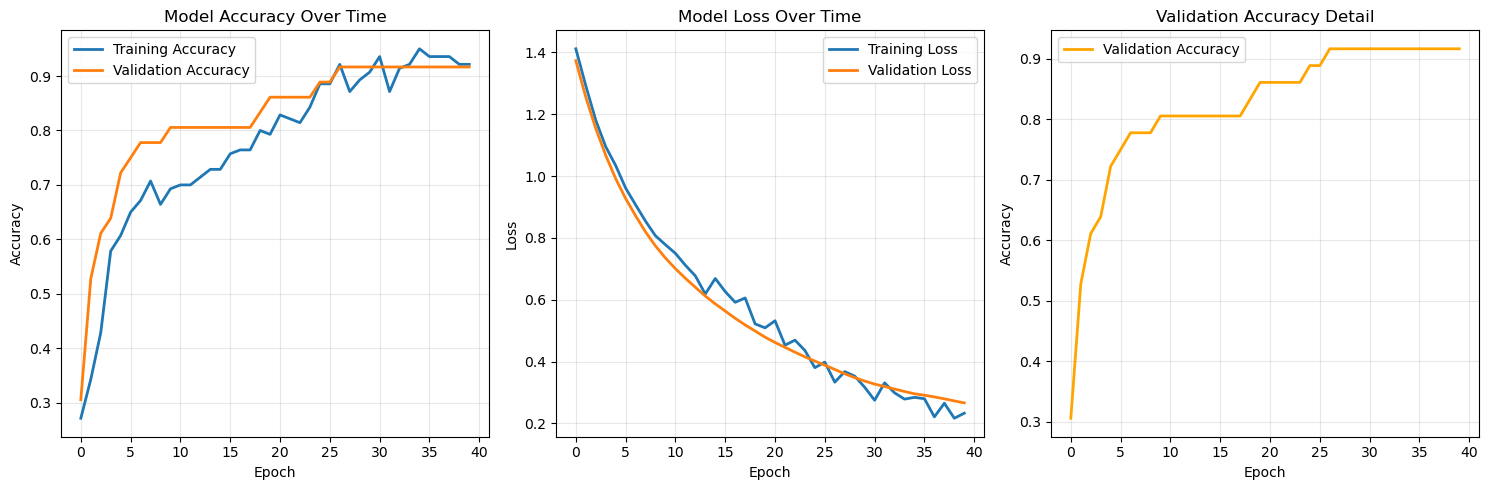


EXAMPLE PREDICTIONS
1. Test Student 1
   Predicted: Cultural & Social
   Actual: Cultural & Social
   Confidence: 0.974
   
2. Test Student 2
   Predicted: Cultural & Social
   Actual: Cultural & Social
   Confidence: 0.996
   
3. Test Student 3
   Predicted: Cultural & Social
   Actual: Cultural & Social
   Confidence: 0.994
   
4. Test Student 4
   Predicted: Cultural & Social
   Actual: Cultural & Social
   Confidence: 0.993
   
5. Test Student 5
   Predicted: Cultural & Social
   Actual: Cultural & Social
   Confidence: 0.930
   

 Training completed successfully!


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

class UniversityEventRecommender:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.event_categories = {
            0: 'Academic & Career',
            1: 'Technical & Innovation',
            2: 'Sports & Physical Wellness',
            3: 'Cultural & Social',
           
        }
        self.feature_columns = []  #  To store the exact feature columns used

    def load_and_preprocess_data(self, csv_file_path):
        print("Loading dataset...")
        df = pd.read_csv(csv_file_path)
        df = df.fillna(0)

        # Feature columns
        feature_columns = ['GPA', 'Interest_AcademicWorkshop', 'Interest_CareerDev', 
                           'Interest_SocialActivities', 'Interest_Sports',          
                           'Interest_CulturalPrograms', 'Interest_TechMeetups',       
                           'ParticipatedBefore', 'EventTypesAttended',         
                           'Hypo_TechWorkshop', 'Hypo_ResumeWorkshop',        
                           'Hypo_CulturalNight', 'Hypo_SportsTournament',     
                           'Hypo_SocialCampaign', 'Personality',                
                           'InterestTopics', 'SkillsToDevelop']

        # Filter only existing columns in dataset
        feature_columns = [col for col in feature_columns if col in df.columns]
        self.feature_columns = feature_columns  #  Save feature columns list for later use in prediction
        X = df[feature_columns].values
        y = self.create_labels(df)

        df['Label'] = y
        labeled_csv_path = "labeled_" + csv_file_path
        df.to_csv(labeled_csv_path, index=False)
        print(f"Labeled dataset saved as '{labeled_csv_path}'")

        print(f"Dataset shape: {df.shape}")
        print(f"Features: {X.shape}, Labels: {y.shape}")
        return X, y

    # Label calculation method
    def create_labels(self, df):
        labels = []
        for _, row in df.iterrows():
            participated_score = row.get('ParticipatedBefore', 0)

            academic_score = (
                row.get('Interest_AcademicWorkshop', 0) +
                row.get('Interest_CareerDev', 0)  +
                row.get('Hypo_ResumeWorkshop', 0)  +
                participated_score
            )
            technical_score = (
                row.get('Interest_TechMeetups', 0) +
                row.get('Hypo_TechWorkshop', 0) +
                participated_score
            )
            sports_score = (
                row.get('Interest_Sports', 0) +
                row.get('Hypo_SportsTournament', 0) +
                participated_score
            )
            cultural_score = (
                row.get('Interest_CulturalPrograms', 0) +
                row.get('Interest_SocialActivities', 0) +
                row.get('Hypo_CulturalNight', 0) +
                row.get('Hypo_SocialCampaign', 0) +
                participated_score
            )
            

            scores = [academic_score, technical_score, sports_score, cultural_score]

            if max(scores) == 0:
                gpa = row.get('GPA', 0.5)
                label = 1 if gpa > 0.7 else 0
            else:
                label = scores.index(max(scores))

            labels.append(label)

        return np.array(labels)

    # Model Development
    def build_model(self, input_dim, num_classes=4):
        model = Sequential([
            Dense(64, input_shape=(input_dim,), activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(num_classes, activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    # Plot training history with visualization
    def plot_training_history(self, history):
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
        plt.title('Model Accuracy Over Time')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 3, 2)
        plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
        plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
        plt.title('Model Loss Over Time')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 3, 3)
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='orange')
        plt.title('Validation Accuracy Detail')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    # Train the Model
    def train_model(self, X, y, test_size=0.2, epochs=100):
        print("\n" + "="*50)
        print("TRAINING MODEL")
        print("="*50)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        print(f"Training set: {X_train_scaled.shape[0]} samples")
        print(f"Test set: {X_test_scaled.shape[0]} samples")

        self.model = self.build_model(X_train_scaled.shape[1])

        print(f"\nTraining for {epochs} epochs...")
        history = self.model.fit(
            X_train_scaled, y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=32,
            verbose=1
        )

        print("\n" + "="*50)
        print("MODEL EVALUATION")
        print("="*50)

        y_pred = self.model.predict(X_test_scaled, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)

        accuracy = accuracy_score(y_test, y_pred_classes)
        precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred_classes, average='weighted', zero_division=0)

        print(f"Accuracy:  {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1-Score:  {f1:.4f}")

        print("\nDetailed Classification Report:")
        target_names = [self.event_categories[i] for i in range(len(self.event_categories))]
        print(classification_report(y_test, y_pred_classes, target_names=target_names, zero_division=0))

        self.plot_training_history(history)
        return history

    def predict_event_category(self, student_data):
        if self.model is None:
            raise ValueError("Model not trained yet.")

        # Convert input list to DataFrame using saved feature columns to ensure correct order & count
        student_df = pd.DataFrame([student_data], columns=self.feature_columns)
        student_data_scaled = self.scaler.transform(student_df)

        prediction = self.model.predict(student_data_scaled, verbose=0)
        predicted_class = np.argmax(prediction[0])
        confidence = np.max(prediction[0])

        return {
            'category': self.event_categories[predicted_class],
            'confidence': confidence,
            'all_probabilities': {
                self.event_categories[i]: float(prob)
                for i, prob in enumerate(prediction[0])
            }
        }

def main():
    print(" UNIVERSITY EVENT RECOMMENDER SYSTEM")
    print("="*50)

    recommender = UniversityEventRecommender()
    csv_file_path = 'dropNewone.csv'

    try:
        X, y = recommender.load_and_preprocess_data(csv_file_path)
        history = recommender.train_model(X, y, epochs=40)

        print("\n" + "="*50)
        print("EXAMPLE PREDICTIONS")
        print("="*50)

        # Use actual test dataset examples for predictions
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=0, stratify=y
        )

        # Select 5 random examples from test set
        np.random.seed(42)  # For reproducible selection
        test_indices = np.random.choice(len(X_test), size=5, replace=False)
        example_students = [X_test[i] for i in test_indices]
        actual_labels = [y_test[i] for i in test_indices]

        labels = [
            "Test Student 1",
            "Test Student 2",
            "Test Student 3",
            "Test Student 4",
            "Test Student 5"
        ]

        for i, (student_data, label, actual_label) in enumerate(zip(example_students, labels, actual_labels)):
            result = recommender.predict_event_category(student_data)
            actual_category = recommender.event_categories[actual_label]
            print(f"{i+1}. {label}")
            print(f"   Predicted: {result['category']}")
            print(f"   Actual: {actual_category}")
            print(f"   Confidence: {result['confidence']:.3f}")
            correct = "" if result['category'] == actual_category else ""
            print(f"   {correct}")

        print("\n Training completed successfully!")

    except FileNotFoundError:
        print(f" Error: Could not find '{csv_file_path}'")
        print("Please ensure the CSV file is in the correct location.")
    except Exception as e:
        print(f" Error: {str(e)}")

if __name__ == "__main__":
    main()
